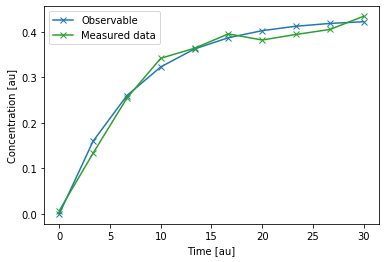

In [26]:
import pyabc
from study_abc_noise.model import \
    ConversionReactionModelVars as ModelVars
import numpy as np
import scipy.stats as stats
import scipy.integrate as integrate
import matplotlib.pyplot as plt
import logging
import pickle
import os
%matplotlib inline

# for debugging
df_logger = logging.getLogger('Distance')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Acceptor')
df_logger.setLevel(logging.DEBUG)
df_logger = logging.getLogger('Epsilon')
df_logger.setLevel(logging.DEBUG)

# model
mv = ModelVars(n_t=10)

# data
def get_data():
    try:
        data = pickle.load(open("data_cr.dat", 'rb'))
    except:
        data = mv.get_model_noisy()(mv.p_true)
        pickle.dump(data, open("data_cr.dat", 'wb'))
    return data
data = get_data()
# plot it
mv.viz_data_and_sim(data)

In [11]:
acceptor = pyabc.StochasticAcceptor()
temperature = pyabc.Temperature()

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
h = abc.new("sqlite:///h_cr.db", data)
h = abc.run()

INFO:History:Start <ABCSMC(id=2, start_time=2019-11-21 23:40:21.030030, end_time=None)>
INFO:ABC:Calibration sample before t=0.
DEBUG:Acceptor:pdf_norm=5.0130e+01 for t=0.
INFO:ABC:t: 0, eps: 1478.105588328931.
DEBUG:Acceptor:Encountered pd=6.2768e+01 > c=5.0130e+01, thus weight=1.0086e+00.
DEBUG:Acceptor:Encountered pd=8.0782e+01 > c=5.0130e+01, thus weight=1.0210e+00.
INFO:ABC:Acceptance rate: 100 / 265 = 3.7736e-01, ESS=9.9999e+01.
DEBUG:Acceptor:pdf_norm=8.0782e+01 for t=1.
DEBUG:Epsilon:Proposed temperatures: [353.3394403640937, 739.0527941644655].
INFO:ABC:t: 1, eps: 353.3394403640937.
DEBUG:Acceptor:Encountered pd=1.2236e+02 > c=8.0782e+01, thus weight=1.1249e+00.
DEBUG:Acceptor:Encountered pd=9.1273e+01 > c=8.0782e+01, thus weight=1.0301e+00.
DEBUG:Acceptor:Encountered pd=8.5329e+01 > c=8.0782e+01, thus weight=1.0129e+00.
INFO:ABC:Acceptance rate: 100 / 326 = 3.0675e-01, ESS=8.8838e+01.
DEBUG:Acceptor:pdf_norm=1.2236e+02 for t=2.
DEBUG:Epsilon:Proposed temperatures: [228.405807

In [12]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel)
temperature = pyabc.Temperature()

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
h_badc = abc.new("sqlite:///h_cr_badc.db", data)
h_badc = abc.run()

INFO:History:Start <ABCSMC(id=2, start_time=2019-11-21 23:40:43.505384, end_time=None)>
DEBUG:Acceptor:pdf_norm=1.4965e+02 for t=0.
INFO:ABC:Calibration sample before t=0.
INFO:ABC:t: 0, eps: 1592.6621574944986.
INFO:ABC:Acceptance rate: 100 / 303 = 3.3003e-01, ESS=1.0000e+02.
DEBUG:Acceptor:pdf_norm=1.4965e+02 for t=1.
DEBUG:Epsilon:Proposed temperatures: [686.5019222213743, 796.3310787472493].
INFO:ABC:t: 1, eps: 686.5019222213743.
INFO:ABC:Acceptance rate: 100 / 282 = 3.5461e-01, ESS=9.2406e+01.
DEBUG:Acceptor:pdf_norm=1.4965e+02 for t=2.
DEBUG:Epsilon:Proposed temperatures: [354.6468173113365, 343.2509611106872].
INFO:ABC:t: 2, eps: 343.2509611106872.
INFO:ABC:Acceptance rate: 100 / 355 = 2.8169e-01, ESS=8.8764e+01.
DEBUG:Acceptor:pdf_norm=1.4965e+02 for t=3.
DEBUG:Epsilon:Proposed temperatures: [253.6201848835062, 171.6254805553436].
INFO:ABC:t: 3, eps: 171.6254805553436.
INFO:ABC:Acceptance rate: 100 / 422 = 2.3697e-01, ESS=8.8889e+01.
DEBUG:Acceptor:pdf_norm=1.4965e+02 for t=4.


KeyboardInterrupt: 

  File "/home/yannik/pyabc/pyabc/transition/multivariatenormal.py", line 73, in rvs_single
    sample = self.X.sample(weights=self.w).iloc[0]
  File "/home/yannik/pyabc/pyabc/smc.py", line 639, in _generate_valid_proposal
    theta_ss = transitions[m_ss].rvs()
  File "/home/yannik/pyabc/pyabc/transition/base.py", line 90, in rvs
    return self.rvs_single()
  File "/home/yannik/pyabc/pyabc/model.py", line 227, in accept
    sum_stats_calculator)
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py", line 4930, in sample
    weights = pd.Series(weights, dtype="float64")
  File "/home/yannik/anaconda3/lib/python3.7/site-packages/pandas/core/series.py", line 311, in __init__
    data = sanitize_array(data, index, dtype, copy, raise_cast_failure=True)
  File "/home/yannik/pyabc/pyabc/transition/transitionmeta.py", line 37, in rvs_single
    return f(self)
  File "/home/yannik/pyabc/pyabc/model.py", line 121, in summary_statistics
    raw_data = self.sample(pars

In [ ]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel)
temperature = pyabc.Temperature()

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
h_badc = abc.new("sqlite:///h_cr_badc.db", data)
h_badc = abc.run(max_nr_populations=1)

In [ ]:
acceptor = pyabc.StochasticAcceptor(pdf_norm_method=pyabc.pdf_norm_from_kernel)
temperature = pyabc.Temperature(initial_temperature=1000)

# define the analysis
abc = pyabc.ABCSMC(
    models=mv.get_model(),
    parameter_priors=mv.get_prior(),
    distance_function=mv.get_kernel(),
    eps=temperature,
    acceptor=acceptor)
h_badc = abc.new("sqlite:///h_cr_badc_badinittemp.db", data)
h_badc = abc.run()

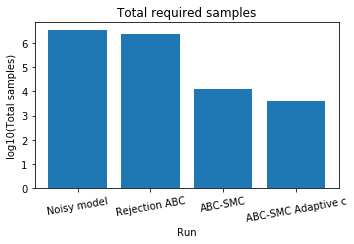

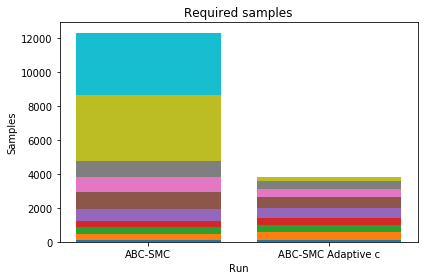

In [62]:
h = pyabc.History("sqlite:///h_cr.db")
h_noisy_model = pyabc.History("sqlite:///h_cr_noisy_model.db")
h_badc = pyabc.History("sqlite:///h_cr_badc.db")
h_rejection = pyabc.History("sqlite:///h_cr_rejection_badc.db")

histories = [h_noisy_model, h_rejection, h_badc, h]
labels = ["Noisy model", "Rejection ABC", "ABC-SMC", "ABC-SMC Adaptive c"]
pyabc.visualization.plot_total_sample_numbers(histories, labels, yscale='log10', rotation=10)
plt.gcf().set_size_inches((5,3.5))
plt.tight_layout()
plt.savefig("total_samples.svg", format='svg')

pyabc.visualization.plot_sample_numbers([h_badc, h], ["ABC-SMC", "ABC-SMC Adaptive c"])
plt.gcf().set_size_inches((6,4))
plt.tight_layout()
plt.savefig("total_samples_adaptive_c.svg", format='svg')

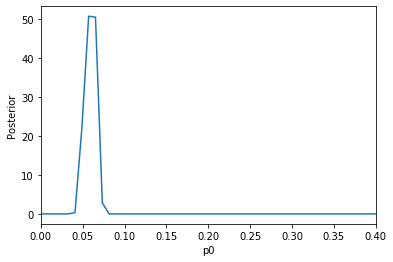

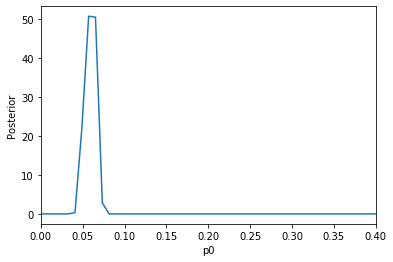

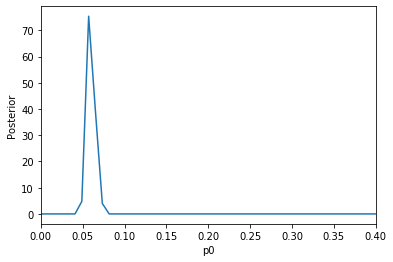

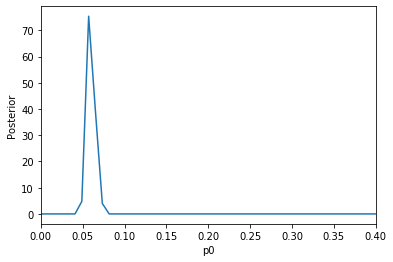

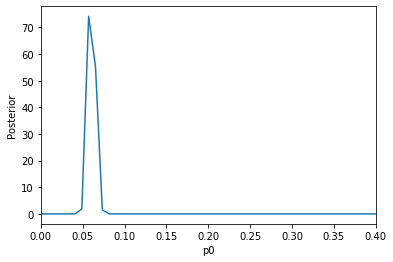

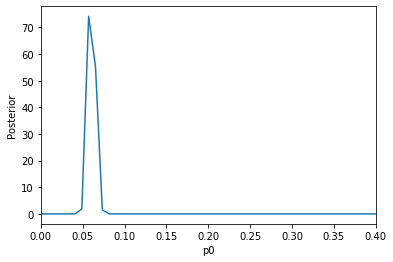

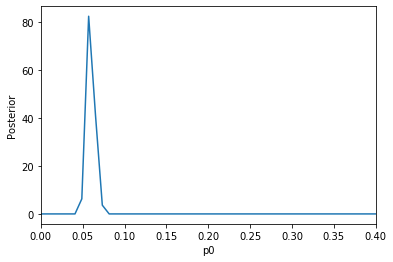

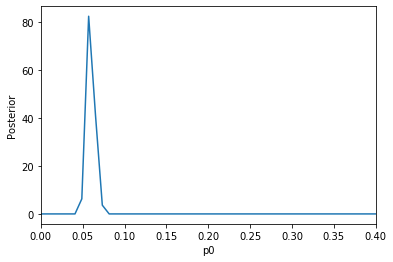

In [46]:
for h in histories:
    for p in ['p0', 'p1']:
        pyabc.visualization.plot_kde_1d_highlevel(h, x='p0', xmin=mv.limits[p][0], xmax=mv.limits[p][1])

In [44]:
import scipy as sp
import numpy as np

model = mv.get_model()
prior = mv.get_prior()

def normal_dty_1d(y_bar, y, sigma):
    dty = ( 1 / np.sqrt( 2 * np.pi * sigma**2 ) 
            * np.exp( - ( (y_bar - y) / sigma)**2 / 2) )
    return dty

def normal_dty(y_bar, y, sigma):
    """
    y_bar: size dim
        point at which to evaluate the density
    y, sigma: size dim
        For N(y, sigma).
    """
    dim = len(y_bar)
    dties = np.zeros(dim)
    for j in range(dim):
        dties[j] = normal_dty_1d(y_bar[j], y[j], sigma[j])
    dty = np.prod(dties)
    return dty

def integrand_from_prior(th, c):
    if type(th) is list:
        th = {'p0': th[0], 'p1': th[1]}

    # data
    y = model(th)['y'].flatten()
    y_obs = data['y'].flatten()

    sigma = mv.noise_std * np.ones(len(y))

    # likelihood
    likelihood_val = normal_dty(y_obs, y, sigma)

    # prior
    prior_val = prior.pdf(th)

    return (likelihood_val / c) * prior_val


c_max = normal_dty(data['y'].flatten(), data['y'].flatten(), mv.noise_std * np.ones(mv.n_t))
print(c_max, np.log(c_max))

def integrand_from_prior_c_max(th):
    return integrand_from_prior(th, c_max)

def true_posterior_unscaled(th):
    if type(th) is list:
        th = {'p0': th[0], 'p1': th[1]}

    # data
    y = model(th)['y'].flatten()
    y_obs = data['y'].flatten()
    
    sigma = mv.noise_std * np.ones(len(y))

    # likelihood
    likelihood_val = normal_dty(y_obs, y, sigma)

    # prior
    prior_val = prior.pdf(th)

    # posterior value
    unscaled_posterior = likelihood_val * prior_val

    return unscaled_posterior

c_found = np.exp(2.7233e1)

true_posterior_normalization = integrate.dblquad(lambda x, y: true_posterior_unscaled([x,y]), 
                                                 mv.limits['p0'][0], mv.limits['p0'][1], 
                                                 lambda x: mv.limits['p1'][0], 
                                                 lambda x: mv.limits['p1'][1])[0]

def true_posterior(th):
    return true_posterior_unscaled(th) / true_posterior_normalization

def integrand_from_posterior(th, c):
    if type(th) is list:
        th = {'p0': th[0], 'p1': th[1]}

    # data 
    y = model(th)['y'].flatten()
    y_obs = data['y'].flatten()
    
    sigma = mv.noise_std * np.ones(len(y))

    # likelihood
    likelihood_val = normal_dty(y_obs, y, sigma)

    # posterior
    posterior_val = true_posterior(th)

    return (likelihood_val / c)  * posterior_val

def integrand_from_posterior_c_max(th):
    return integrand_from_posterior(th, c_max)
def integrand_from_posterior_c_found(th):
    return integrand_from_posterior(th, c_found)


integral_prior_max = sp.integrate.dblquad(lambda x, y: integrand_from_prior_c_max([x,y]),
                                          mv.limits['p0'][0], mv.limits['p0'][1],
                                          lambda x: mv.limits['p1'][0],
                                          lambda x: mv.limits['p1'][1])[0]
integral_posterior_found = sp.integrate.dblquad(lambda x, y: integrand_from_posterior_c_max([x,y]),
                                                mv.limits['p0'][0], mv.limits['p0'][1],
                                                lambda x: mv.limits['p1'][0], 
                                                lambda x: mv.limits['p1'][1])[0]
integral_posterior_found = sp.integrate.dblquad(lambda x, y: integrand_from_posterior_c_found([x,y]),
                                                mv.limits['p0'][0], mv.limits['p0'][1],
                                                lambda x: mv.limits['p1'][0], 
                                                lambda x: mv.limits['p1'][1])[0]

9972423227091.63 29.930844722234735


KeyboardInterrupt: 

In [37]:
1 / integral_prior_max * 100

2271624.472431556